In [ ]:
from pathlib import Path
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
rng=np.random.default_rng(seed=42)
import tensorflow as tf
from  tensorflow.keras import *
tf.keras.losses.sparse_categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.regularizers.l1


keras.src.regularizers.regularizers.L1

In [2]:
###----------------------
### Some basic parameters
###----------------------

inpDir = Path('..') / '..' / 'input'
outDir = Path('..') / 'output'
modelDir = Path('..') / 'models'
subDir = 'fifa_2019'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 101 # number of epochs
BATCH_SIZE = 32
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
physical_devices=tf.config.list_physical_devices('GPU')

if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices)

In [4]:
data_df=pd.read_csv(r"D:\dnn_input\fifa_2019.csv")
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
data_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
df.info()

NameError: name 'df' is not defined

In [9]:
data_df = data_df[data_df["Position"].notnull()]
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
# Following columns appear to be relevant for our analysis
rel_cols = ["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
            'GKKicking', 'GKPositioning', 'GKReflexes']

In [11]:
goalkeeper = 'GK'
forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS','LS', 'CF']
midfielder = ['CM','RCM','LCM', 'CDM','RDM','LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']

In [12]:
#Assign labels to goalkeepers
data_df.loc[data_df["Position"] == "GK", "Position"] = 0

#Defenders
data_df.loc[data_df["Position"].isin(defender), "Position"] = 1

#Midfielders
data_df.loc[data_df["Position"].isin(midfielder), "Position"] = 2

#Forward
data_df.loc[data_df["Position"].isin(forward), "Position"] = 3

# Convert Column "Position" to numeric so that Pandas does not complain
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast="integer")

In [13]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
labels = {0: 'Goal Keeper',
        1: 'Defender',
        2: 'Mid-Fielder',
        3: 'Forward'}

In [15]:
# splitting in train ans test datasets
train_df, test_df = train_test_split(data_df,
                                     stratify=data_df['Position'],
                                     test_size=TEST_SIZE, 
                                     random_state=RANDOM_STATE )
train_df.shape, test_df.shape

((14517, 34), (3630, 34))

In [16]:
X,y=data_df.drop('Position',axis=1),data_df['Position']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14517, 33), (3630, 33), (14517,), (3630,))

In [17]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Convert to DataSet

In [18]:
train_df = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_df = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [19]:
BATCH_SIZE = 64
train_df = train_df.shuffle(buffer_size= X_train.shape[0]).batch(BATCH_SIZE)
test_df = test_df.shuffle(buffer_size= X_test.shape[0]).batch(BATCH_SIZE)

In [20]:
train_ds = train_df.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_df.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
for step,(X_batch,y_batch) in enumerate(train_ds.take(50)):
    print(f"Batch {step+1}: Features shape {X_batch.shape}, Labels shape {y_batch.shape}")

Batch 1: Features shape (64, 33), Labels shape (64,)
Batch 2: Features shape (64, 33), Labels shape (64,)
Batch 3: Features shape (64, 33), Labels shape (64,)
Batch 4: Features shape (64, 33), Labels shape (64,)
Batch 5: Features shape (64, 33), Labels shape (64,)
Batch 6: Features shape (64, 33), Labels shape (64,)
Batch 7: Features shape (64, 33), Labels shape (64,)
Batch 8: Features shape (64, 33), Labels shape (64,)
Batch 9: Features shape (64, 33), Labels shape (64,)
Batch 10: Features shape (64, 33), Labels shape (64,)
Batch 11: Features shape (64, 33), Labels shape (64,)
Batch 12: Features shape (64, 33), Labels shape (64,)
Batch 13: Features shape (64, 33), Labels shape (64,)
Batch 14: Features shape (64, 33), Labels shape (64,)
Batch 15: Features shape (64, 33), Labels shape (64,)
Batch 16: Features shape (64, 33), Labels shape (64,)
Batch 17: Features shape (64, 33), Labels shape (64,)
Batch 18: Features shape (64, 33), Labels shape (64,)
Batch 19: Features shape (64, 33), La

## Define Model

In [22]:
len(train_ds)

227

In [23]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(33,)),
    tf.keras.layers.Dense(23,activation='relu',),
    tf.keras.layers.Dense(13,activation='relu'),
    tf.keras.layers.Dense(4),
])

model.compile(optimizer=tf.keras.optimizers.Adam(ALPHA),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=EPOCHS)

Epoch 1/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7222 - loss: 1.4927 - val_accuracy: 0.7804 - val_loss: 0.5813
Epoch 2/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.5001 - val_accuracy: 0.8077 - val_loss: 0.4604
Epoch 3/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.4281 - val_accuracy: 0.8273 - val_loss: 0.4047
Epoch 4/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8285 - loss: 0.3955 - val_accuracy: 0.8358 - val_loss: 0.3821
Epoch 5/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.3783 - val_accuracy: 0.8441 - val_loss: 0.3669
Epoch 6/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8441 - loss: 0.3664 - val_accuracy: 0.8479 - val_loss: 0.3565
Epoch 7/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8492 - loss: 0.3583 - val_accuracy: 0.8493 - val_loss: 0.3505
Epoch 8/101
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3529 - val_accu

## Graph plot

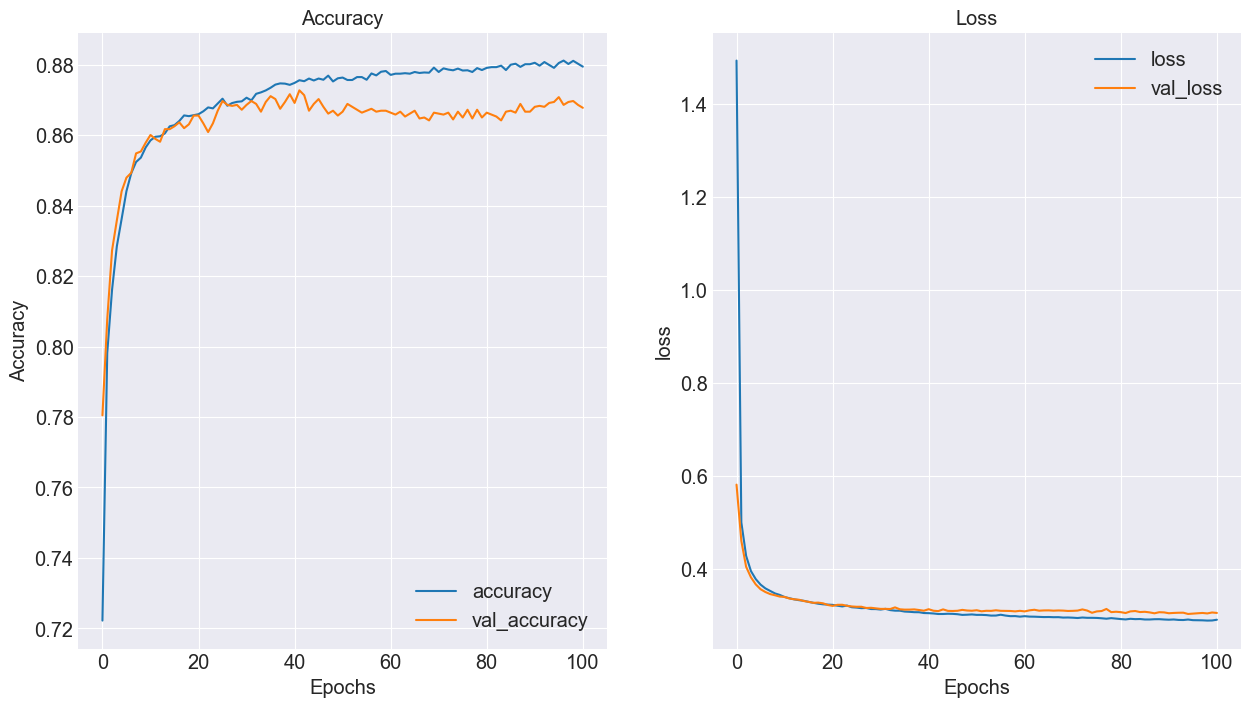

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax[0].plot(history.epoch,history.history['accuracy'],label='accuracy')
ax[0].plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.epoch,history.history['loss'],label='loss')
ax[1].plot(history.epoch,history.history['val_loss'],label='val_loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

plt.show()

In [26]:
model.evaluate(train_ds,verbose=2)

227/227 - 0s - 2ms/step - accuracy: 0.8808 - loss: 0.2871


[0.2871077358722687, 0.8807604908943176]

## Predictions

In [27]:
data,y_true,y_pred=[],[],[]
for fest,lbls,in train_ds:
    pred=model(fest).numpy()
    y_true.extend(lbls)
    y_pred.extend(pred.argmax(axis=1))
    data.append(lbls)

print(f'Accuracy:{accuracy_score(y_true,y_pred):.4f}')
print(classification_report(y_true,y_pred))

Accuracy:0.8808
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       0.90      0.94      0.92      4693
           2       0.84      0.85      0.84      5470
           3       0.87      0.77      0.82      2734

    accuracy                           0.88     14517
   macro avg       0.90      0.89      0.89     14517
weighted avg       0.88      0.88      0.88     14517



In [28]:

from tensorflow.keras.utils import plot_model

# Assuming 'model' is your compiled Keras model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your compiled Keras model
plot_model(model,show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
